<h1 align="center">Leveraging Ensemble Learning Techniques for Enhanced Loan Repayment Prediction.
</h1>
<hr>

#OBJECTIVES:

* Predict whether a bank should approve a loan application based on the applicant's profit using Ensemble Learning Methods.
* This is Classification Problem. In classification problems, the goal is to categorize data into distinct classes or labels based on input features.
* For loan repayment prediction, we want to determine whether a loan will be repaid or defaulted.
* The output is a discrete class label.

**Submission by:**

**Name:** PAVAN KUMAR KURVA

**University ID Number:** 22065713
<hr>

#IMPORTING LIBRARIES

In [ ]:
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for statistical data visualization

#Encoding categorical labels into numerical values
from sklearn.preprocessing import LabelEncoder
from scipy import stats # To Perform Statistical Functions

# scaling each feature to a given range, typically between zero and one
# standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# train_test_split - split datasets into random train and test subsets
# cross_val_score - used to assess how well a model generalizes to unseen data
# GridSearchCV - hyperparameter tuning
# StratifiedKFold - Train/test indices to split data into train/test sets.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression  # Linear model for binary classification.
from sklearn.neighbors import KNeighborsClassifier # Non-parametric classification based on nearest neighbors.
from sklearn.tree import DecisionTreeClassifier # Tree-based model for classification.

# BaggingClassifier - Ensemble method using bootstrap aggregating.
# AdaBoostClassifier - Boosting algorithm combining weak learners.
# RandomForestClassifier - Ensemble of decision trees.
# GradientBoostingClassifier - Boosting with gradient descent.
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier # MLPClassifier: Multi-layer perceptron (neural network) for classification.
from sklearn.svm import SVC # SVC: Support Vector Machine for classification.

# accuracy_score - Measures the proportion of correctly predicted instances.
# confusion_matrix - Summarizes true positive, true negative, false positive, and false negative counts.
# classification_report - Provides precision, recall, F1-score, and support for each class.
# precision_score - Measures the proportion of true positive predictions among all positive predictions.
# recall_score - Measures the proportion of true positive predictions among actual positives.
# f1_score - Harmonic mean of precision and recall.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# LOADING DATASET FROM .CSV FILE


In [ ]:
# Reading CSV file
print("Reading CSV file...")
df = pd.read_csv("/content/loan_data.csv")
print("DataFrame created.")


Reading CSV file...
DataFrame created.


# DATA PREPROCESSING

In [ ]:
# Displaying DataFrame information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


Here we can see that attribute purpose has object datatype. We need to deal with it.

In [ ]:
# Summery
print(df.describe())

       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.0000

## Removing Null Values

In [ ]:
# Checking for null values
print("Null values count:", df.isnull().sum().sum())

Null values count: 0


Our DataFrame contain **Zero** Null values.

In [ ]:
# unique values in purpose attribute
relative_frequencies = df.purpose.value_counts(normalize=True)

It has 6 unique values. lets convert these labels into numeric form.

## Removing Outliers

In [ ]:
# remove outliers from all columns
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1) # this line of code will remove the outliers
new_df = df[filtered_entries]


## Encoding



*   We will be using Label Encoder to convert labels available in purpose attribute.
*   It will Encode purpose labels with value between 0 and n_classes-1(5)



In [ ]:
# Encoding categorical labels into numerical values
df['purpose'] = LabelEncoder().fit_transform(df['purpose'])

# Print the first few rows of the DataFrame
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Normalization and Scaling

In [ ]:
# Normalization
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)

# Scaling
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(normalized_df), columns=normalized_df.columns)

# DATA VISUALIZATION

## Histogram - 1

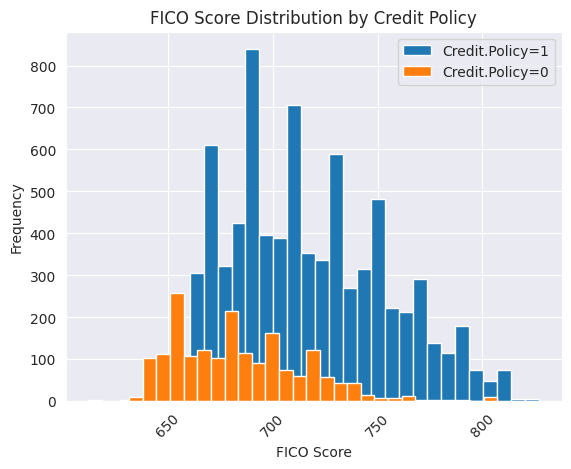

In [ ]:
# Plotting FICO score distribution by credit policy
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy'] == 1], bins=30, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy'] == 0], bins=30, label='Credit.Policy=0')
plt.title('FICO Score Distribution by Credit Policy')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()



## Histogram - 2

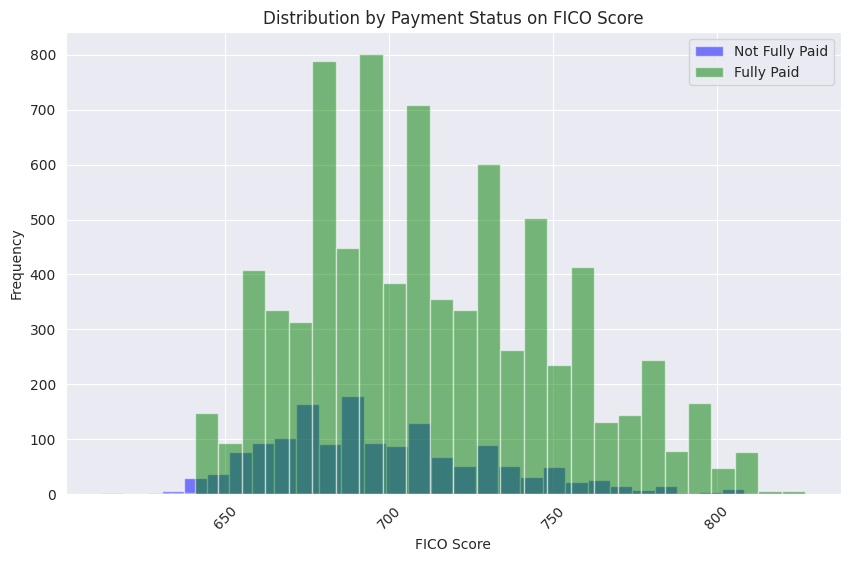

In [ ]:
# Plotting FICO score distribution by payment status
plt.figure(figsize=(10,6))
df[df['not.fully.paid'] == 1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='Not Fully Paid')
df[df['not.fully.paid'] == 0]['fico'].hist(bins=30, alpha=0.5, color='green', label='Fully Paid')
plt.title('Distribution by Payment Status on FICO Score')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## CountPlot

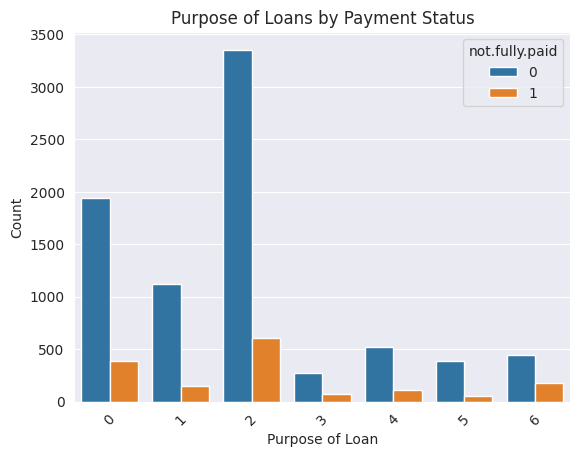

In [ ]:
# Creating count plot of loan purpose by payment status
sns.countplot(data=df, x='purpose', hue='not.fully.paid')
plt.title('Purpose of Loans by Payment Status')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Joint Plot

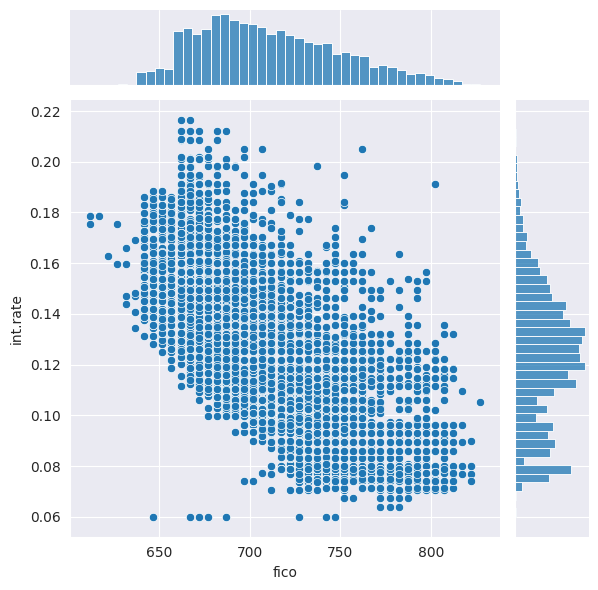

In [ ]:
# Creating joint plot of FICO and interest rate
sns.jointplot(x='fico', y='int.rate', data=df)
plt.show()

## Liner Model Plot

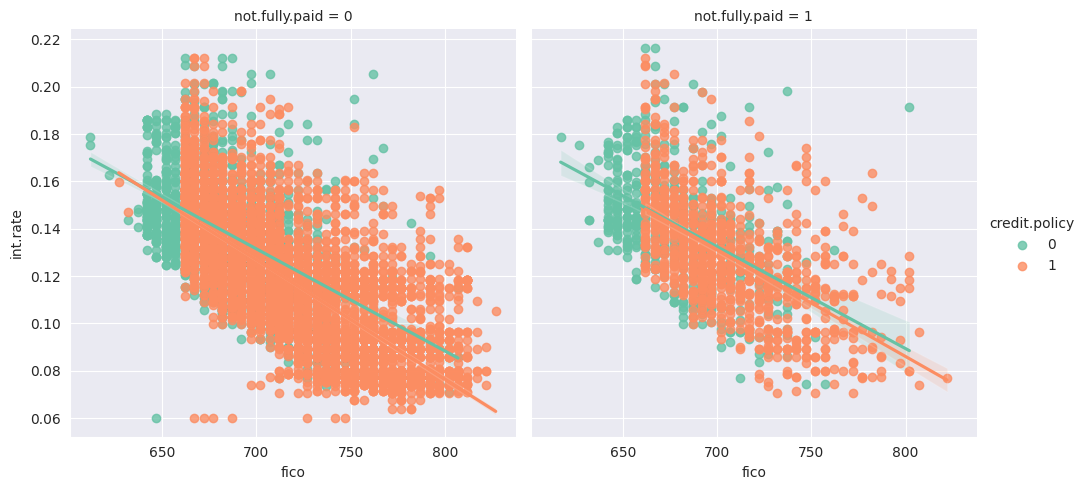

In [ ]:
# Creating linear model plot of FICO and interest rate
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')
plt.show()

## Heatmap

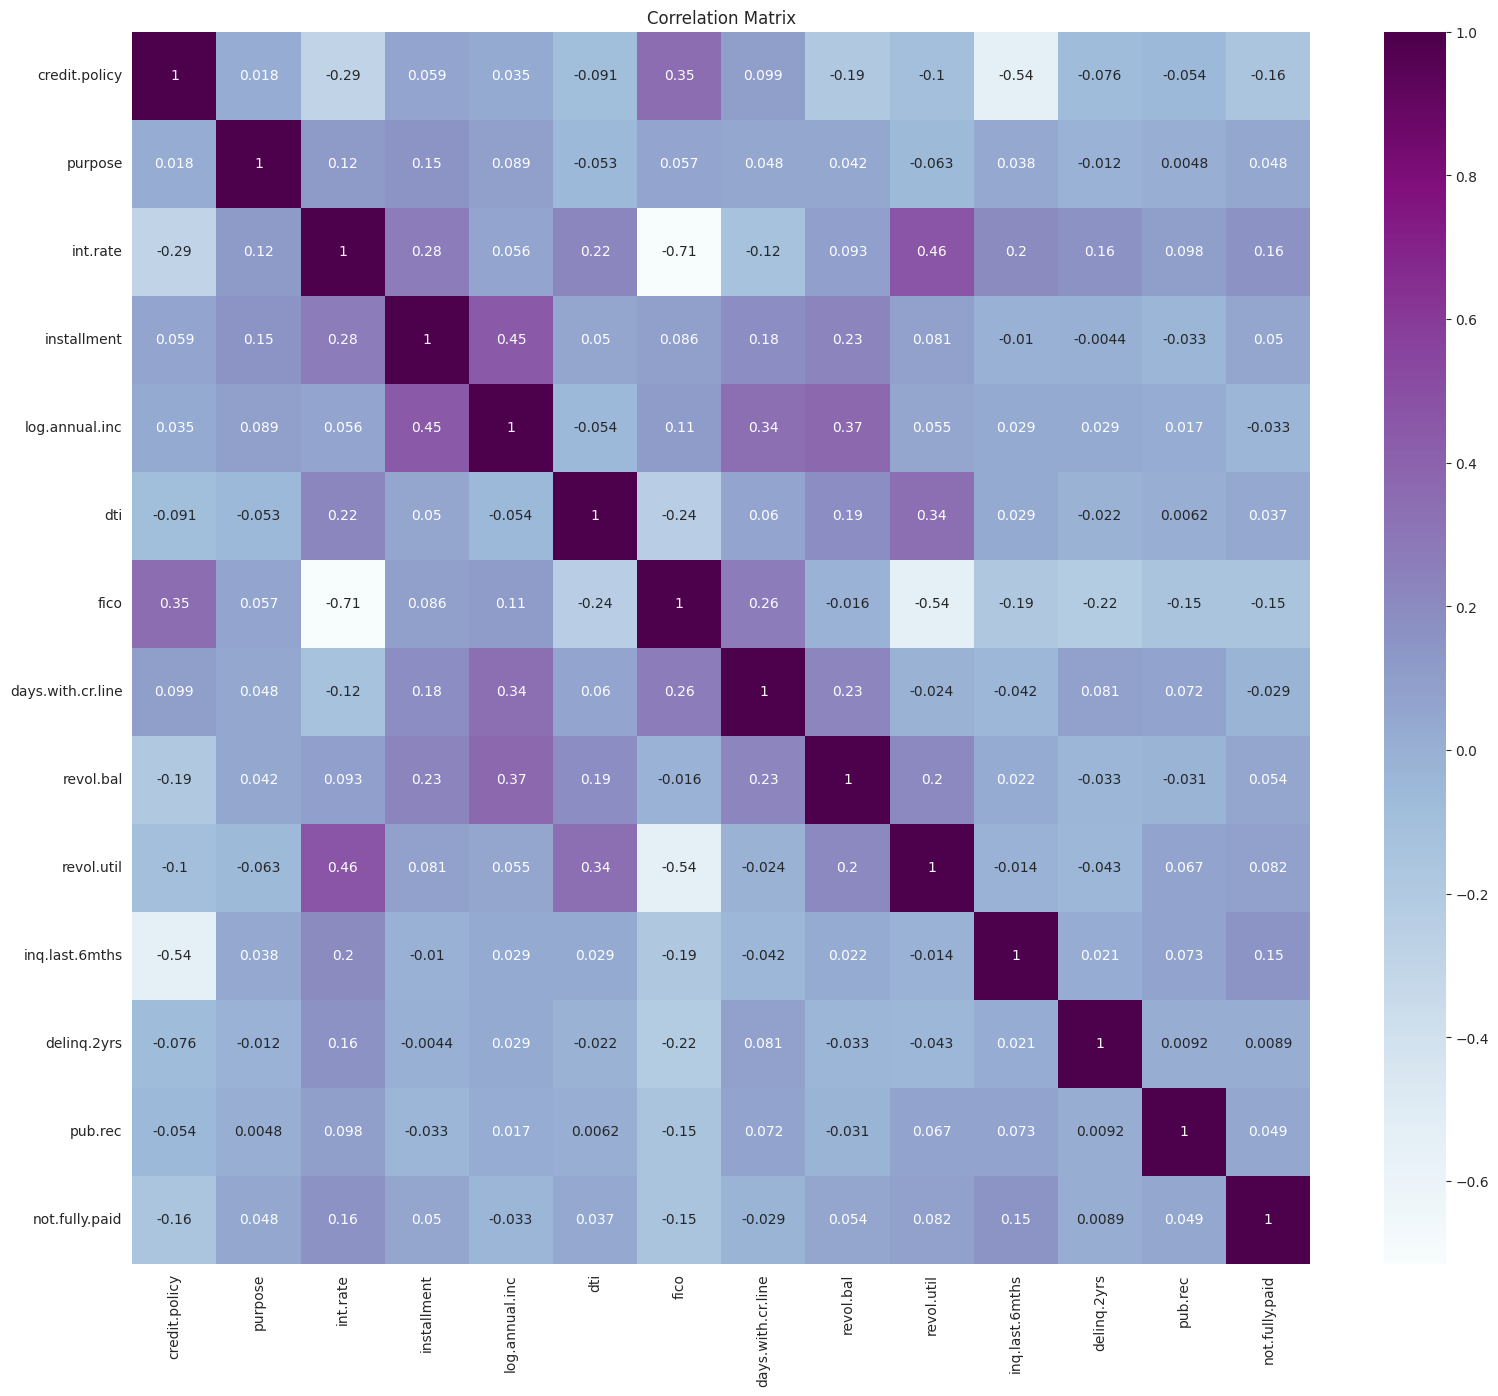

In [ ]:
# Creating heatmap of correlation matrix
plt.figure(figsize=(19, 16))
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.title('Correlation Matrix')
plt.show()

The initial rate, credit policy, FICO score, and number of inquiries in the last six months have a significant impact on the target class (not gully paid).

# TRAIN, TEST SPLIT

The dataset is split into training and testing sets.

In [ ]:
# Splitting data into features and target
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


# MODELLING

## Logistic Regression

In [ ]:
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

# Training Accuracy
y_pred_lr_train = lr_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_lr_train)
print('Logistic Regression Classifier Training Accuracy:', train_accuracy)

# Cross-validation Score
lr_scores = cross_val_score(lr_clf, X_train, y_train, cv=5)
print('Logistic Regression Cross-validation score:', lr_scores.mean())

# Test Accuracy
y_pred_lr_test = lr_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_lr_test)
print('Logistic Regression Classifier Test Accuracy:', test_accuracy)
print("\n")

# Classification Report
print(classification_report(y_test, y_pred_lr_test))

Logistic Regression Classifier Training Accuracy: 0.8353221957040573
Logistic Regression Cross-validation score: 0.8368140282925417
Logistic Regression Classifier Test Accuracy: 0.8472512178148921


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.61      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



We got Accuracy of **84.72%** using Logistic Regression.

CONFUSION MATRIX

Confusion Matrix for Logistic Regression:
[[2424    7]
 [ 432   11]]




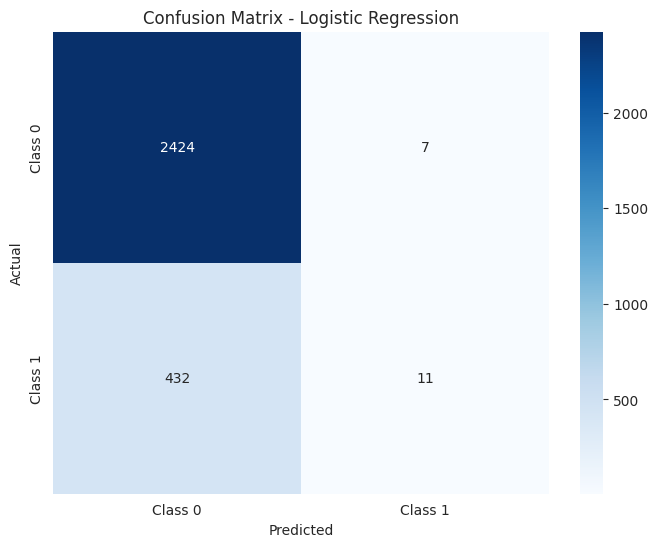

In [ ]:
# Generate confusion matrix
y_pred_lr_test = lr_clf.predict(X_test)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr_test)

# Print confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)
print("\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)

# Training Accuracy
y_pred_dt_train = dt_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_dt_train)
print('Decision Tree Classifier Training Accuracy:', train_accuracy)

# Cross-validation Score
dt_scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
print('Decision Tree Cross-validation score:', dt_scores.mean())

# Test Accuracy
y_pred_dt_test = dt_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_dt_test)
print('Decision Tree Classifier Test Accuracy:', test_accuracy)
print("\n")

# Classification Report
print(classification_report(y_test, y_pred_dt_test, zero_division=1))

Decision Tree Classifier Training Accuracy: 0.8374105011933174
Decision Tree Cross-validation score: 0.8356207775440471
Decision Tree Classifier Test Accuracy: 0.8458594293667363


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       1.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.92      0.50      0.46      2874
weighted avg       0.87      0.85      0.78      2874



We got Accuracy of **84.58%** using Decision Tree Classifier.

CONFUSION MATRIX

Confusion Matrix for Decision Tree:
[[2431    0]
 [ 443    0]]




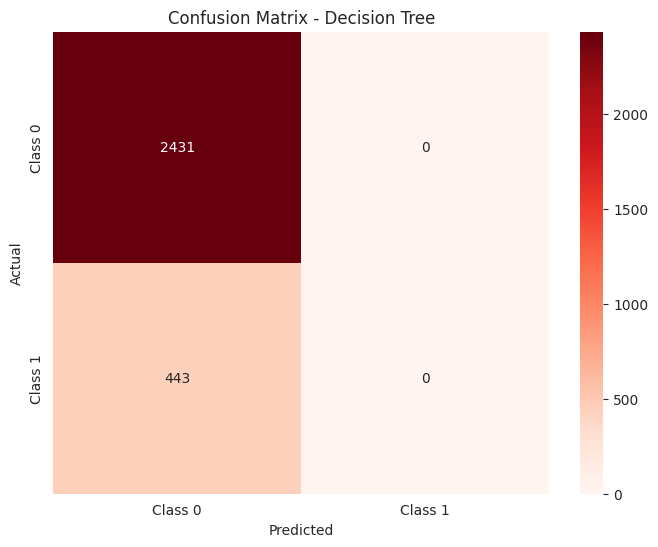

In [ ]:
# Generate confusion matrix
y_pred_dt_test = dt_clf.predict(X_test)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt_test)

# Print confusion matrix
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)
print("\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

## Bagging Classifier

In [ ]:
# Bagging Classifier
# Assuming X_train and y_train are defined earlier

bag_dt = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2))

param_grid = {'n_estimators': [10, 50, 100, 200], 'bootstrap': [True, False]}
grid_search = GridSearchCV(bag_dt, param_grid, scoring='recall_weighted', cv=StratifiedKFold(n_splits=5), n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best Bagging Classifier hyperparameters:', grid_search.best_params_)
print('Best Bagging Classifier score:', grid_search.best_score_)


Best Bagging Classifier hyperparameters: {'bootstrap': True, 'n_estimators': 10}
Best Bagging Classifier score: 0.8374104867163066


## Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=600)
rf_clf.fit(X_train, y_train)

# Training Accuracy
y_pred_rf_train = rf_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_rf_train)
print('Random Forest Classifier Training Accuracy:', train_accuracy)

# Cross-validation Score
rf_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print('Random Forest Classifier Cross-validation score:', rf_scores.mean())

# Test Accuracy
y_pred_rf_test = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_rf_test)
print('Random Forest Classifier Test Accuracy:', test_accuracy)
print("\n")

# Classification Report
print(classification_report(y_test, y_pred_rf_test, zero_division=1))


Random Forest Classifier Training Accuracy: 1.0
Random Forest Classifier Cross-validation score: 0.8354710786114172
Random Forest Classifier Test Accuracy: 0.8475991649269311


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.63      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.74      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



We got Accuracy of **84.75%** using Random Forest.

CONFUSION MATRIX

Confusion Matrix for Random Forest:
[[2431    0]
 [ 443    0]]




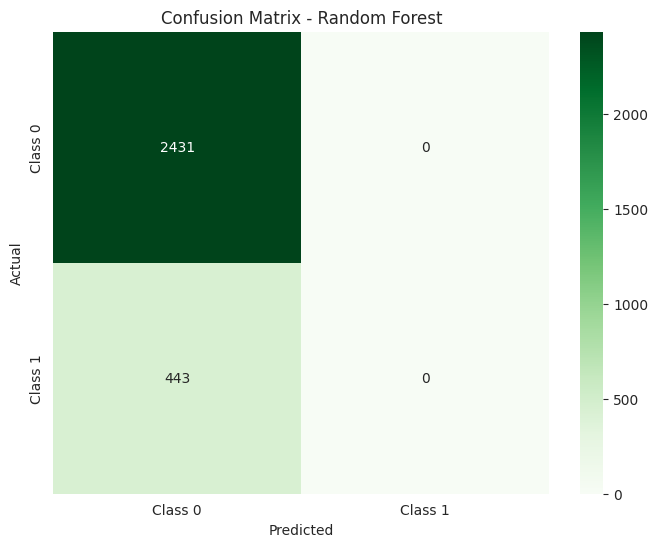

In [ ]:
# Generate confusion matrix
y_pred_rf_test = dt_clf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_test)

# Print confusion matrix
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)
print("\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## AdaBoost Classifier

In [ ]:
adaboost_clf = AdaBoostClassifier(estimator=rf_clf, learning_rate=0.5)
adaboost_clf.fit(X_train, y_train)

# Training Accuracy
y_pred_adaboost_train = adaboost_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_adaboost_train)
print('AdaBoost Classifier Training Accuracy:', train_accuracy)

# Cross-validation Score
adaboost_scores = cross_val_score(adaboost_clf, X_train, y_train, cv=5)
print('AdaBoost Classifier Cross-validation score:', adaboost_scores.mean())

# Test Accuracy
y_pred_adaboost_test = adaboost_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_adaboost_test)
print('AdaBoost Classifier Test Accuracy:', test_accuracy)
print("\n")

# Classification Report
print(classification_report(y_test, y_pred_adaboost_test, zero_division=1))


AdaBoost Classifier Training Accuracy: 1.0
AdaBoost Classifier Cross-validation score: 0.8350232061170656
AdaBoost Classifier Test Accuracy: 0.8472512178148921


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.61      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



We got Accuracy of **84.72%** using AdaBoost Classifier.

CONFUSION MATRIX

Confusion Matrix for Adaboost Classifier:
[[2424    7]
 [ 432   11]]




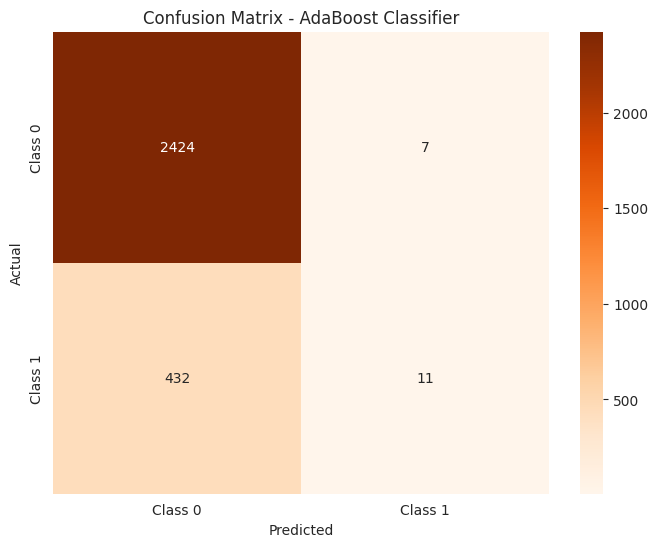

In [ ]:
# Generate confusion matrix
y_pred_adaboost_test = adaboost_clf.predict(X_test)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost_test)

# Print confusion matrix
print("Confusion Matrix for Adaboost Classifier:")
print(conf_matrix_adaboost)
print("\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.show()

## Gradient Boosting

In [ ]:
gb_clf = GradientBoostingClassifier(learning_rate=0.05)
gb_clf.fit(X_train, y_train)

# Training Accuracy
y_pred_gb_train = gb_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_gb_train)
print('Gradient Boosting Classifier Training Accuracy:', train_accuracy)

# Cross-validation Score
gb_scores = cross_val_score(gb_clf, X_train, y_train, cv=5)
print('Gradient Boosting Classifier Cross-validation score:', gb_scores.mean())

# Test Accuracy
y_pred_gb_test = gb_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_gb_test)
print('Gradient Boosting Classifier Test Accuracy:', test_accuracy)
print("\n")

# Classification Report
print(classification_report(y_test, y_pred_gb_test))


Gradient Boosting Classifier Training Accuracy: 0.8445704057279236
Gradient Boosting Classifier Cross-validation score: 0.837112313154585
Gradient Boosting Classifier Test Accuracy: 0.8448155880306193


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.41      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.47      2874
weighted avg       0.78      0.84      0.78      2874



We got Accuracy of **84.48%** using AdaBoost Classifier.

CONFUSION MATRIX

Confusion Matrix for Gradient Boost:
[[2421   10]
 [ 436    7]]




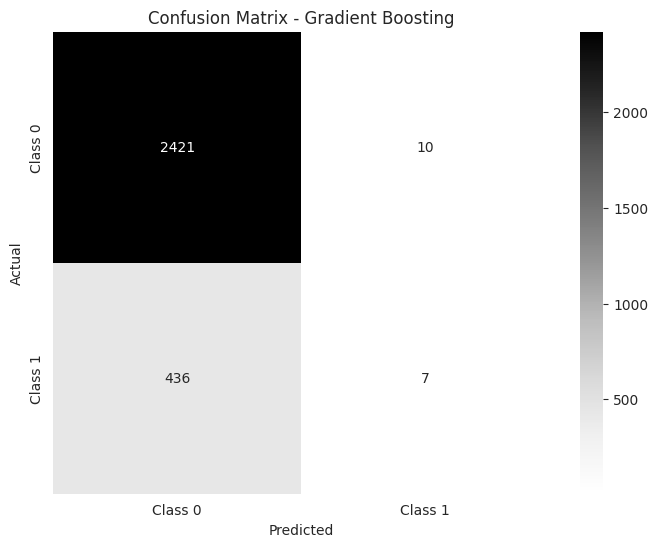

In [ ]:
# Generate confusion matrix
y_pred_gb_test = gb_clf.predict(X_test)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb_test)

# Print confusion matrix
print("Confusion Matrix for Gradient Boost:")
print(conf_matrix_gb)
print("\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Greys',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

## KNN Classifier

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Training Accuracy
y_pred_knn_train = knn_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_knn_train)
print('KNN Classifier Training Accuracy:', train_accuracy)

# Cross-validation Score
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
print('KNN Classifier Cross-validation score:', knn_scores.mean())

# Test Accuracy
y_pred_knn_test = knn_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_knn_test)
print('KNN Classifier Test Accuracy:', test_accuracy)
print("\n")

# Classification Report
print(classification_report(y_test, y_pred_knn_test))

KNN Classifier Training Accuracy: 0.8477028639618138
KNN Classifier Cross-validation score: 0.8138423097042751
KNN Classifier Test Accuracy: 0.8215031315240083


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2431
           1       0.21      0.06      0.09       443

    accuracy                           0.82      2874
   macro avg       0.53      0.51      0.50      2874
weighted avg       0.75      0.82      0.78      2874



We got Accuracy of **82.15%** using KNN.

CONFUSION MATRIX

Confusion Matrix for KNN:
[[2335   96]
 [ 417   26]]




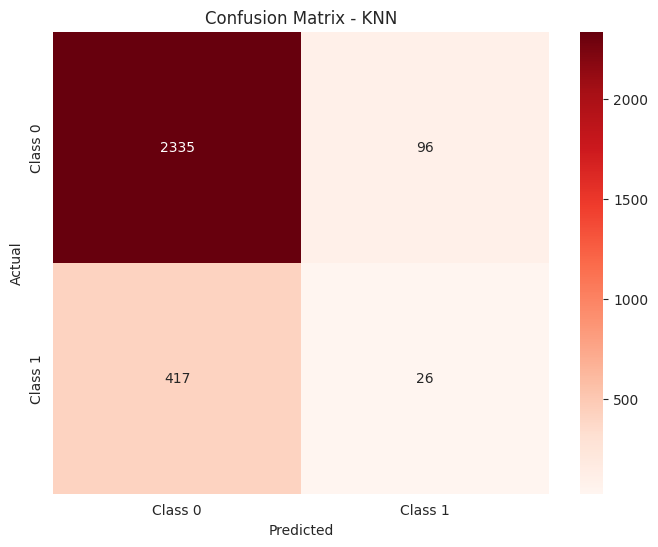

In [ ]:
# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn_test)

# Print confusion matrix
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)
print("\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

## Multi Level Perceptron's

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', solver='adam', early_stopping = True)
mlp_clf.fit(X_train, y_train)

# Training Accuracy
y_pred_mlp_train = mlp_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_mlp_train)
print('MLP Classifier Training Accuracy:', train_accuracy)

# Cross-validation Score
mlp_scores = cross_val_score(mlp_clf, X_train, y_train, cv=5)
print('MLP Classifier Cross-validation score:', mlp_scores.mean())

# Test Accuracy
y_pred_mlp_test = mlp_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_mlp_test)
print('MLP Classifier Test Accuracy:', test_accuracy)
print("\n")

# Classification Report
print(classification_report(y_test, y_pred_mlp_test))


MLP Classifier Training Accuracy: 0.834128878281623
MLP Classifier Cross-validation score: 0.6929399979965942
MLP Classifier Test Accuracy: 0.8434237995824635


              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.33      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.59      0.51      0.47      2874
weighted avg       0.77      0.84      0.78      2874



We got Accuracy of **84.34%** using MLP.

CONFUSION MATRIX

Confusion Matrix for MLP:
[[2417   14]
 [ 436    7]]




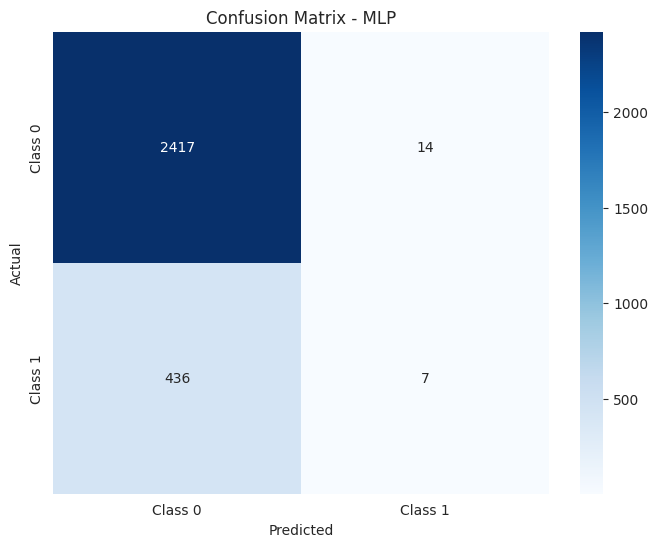

In [ ]:
# Generate confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp_test)

# Print confusion matrix
print("Confusion Matrix for MLP:")
print(conf_matrix_mlp)
print("\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()

## Support Vector Machine

In [ ]:
svm_clf = SVC(kernel='rbf', C=1.0)
svm_clf.fit(X_train, y_train)

# Training Accuracy
y_pred_svm_train = svm_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_svm_train)
print('SVM Classifier Training Accuracy:', train_accuracy)

# Cross-validation Score
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=5)
print('SVM Classifier Cross-validation score:', svm_scores.mean())

# Test Accuracy
y_pred_svm_test = svm_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_svm_test)
print('SVM Classifier Test Accuracy:', test_accuracy)
print("\n")

# Classification Report
print(classification_report(y_test, y_pred_svm_test))


SVM Classifier Training Accuracy: 0.837708830548926
SVM Classifier Cross-validation score: 0.8372613442852849
SVM Classifier Test Accuracy: 0.8462073764787752


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       1.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.92      0.50      0.46      2874
weighted avg       0.87      0.85      0.78      2874



We got Accuracy of **84.62%** using SVM.

CONFUSION MATRIX

Confusion Matrix for SVM:
[[2431    0]
 [ 442    1]]




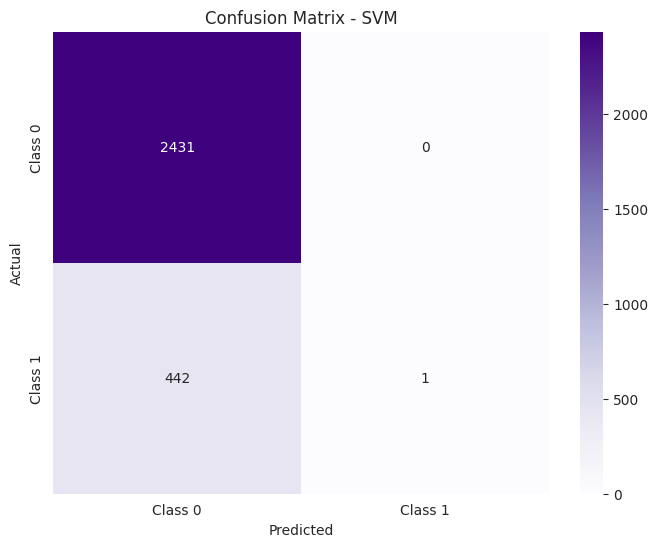

In [ ]:
# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm_test)

# Print confusion matrix
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)
print("\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

#MODEL COMPARISION

In [ ]:
# Models comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'KNN', 'MLP', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_lr_test), accuracy_score(y_test, y_pred_dt_test), accuracy_score(y_test, y_pred_rf_test), accuracy_score(y_test, y_pred_adaboost_test), accuracy_score(y_test, y_pred_gb_test), accuracy_score(y_test, y_pred_knn_test), accuracy_score(y_test, y_pred_mlp_test), accuracy_score(y_test, y_pred_svm_test)]

# Multiply accuracies by 100 to convert to percentage
accuracies = [accuracy * 100 for accuracy in accuracies]

model_comparison = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
model_comparison = model_comparison.sort_values(by='Accuracy', ascending=False)
print(model_comparison)


                 Model   Accuracy
2        Random Forest  84.759916
0  Logistic Regression  84.725122
3             AdaBoost  84.725122
7                  SVM  84.620738
1        Decision Tree  84.585943
4    Gradient Boosting  84.481559
6                  MLP  84.342380
5                  KNN  82.150313


# COMPARISON PLOT

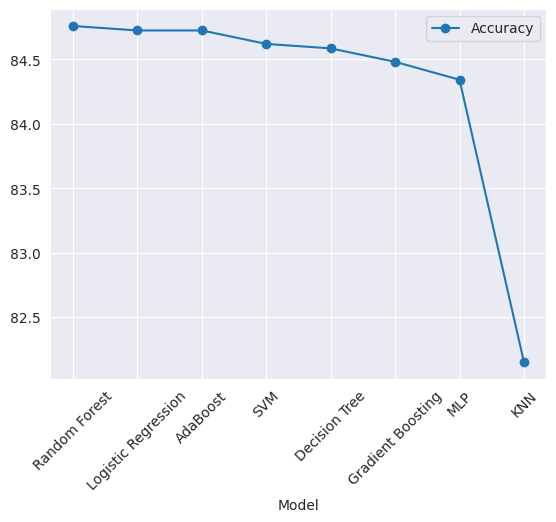

In [ ]:
# Plotting model comparison
model_comparison.plot(x='Model', y='Accuracy', kind='line', marker='o')
plt.xticks(rotation=45)
plt.show()


While comparing different ensemble learning techniques, we observed that most of the bagging and boosting algorithms yielded similar results with minimal variations in accuracy.

However, among all the ensembles evaluated **RANDOM FOREST CLASSIFIER** emerged as the optimal model for this dataset, achieving an accuracy of **84.75%.**

This suggests that Random Forest Classifier's ability to other models and leverage randomness in both feature and data selection contributed to its superior performance on this particular dataset.